In [18]:
import pandas as pd 
import os 
import numpy as np 
from pathlib import Path
from typing import *
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Data Functions

In [19]:
ROOT = os.path.dirname(os.getcwd())+"/data"

def load(path:Path, sep="|"):
    return pd.read_csv(path, sep=sep, na_values=["nan"])

def collect_time_(df:pd.DataFrame,column:str):
    data_times = pd.to_datetime(df[column]).dt
    df["year"] = data_times.year
    df["month"] = data_times.month
    del df_meteo[column]

def set_pickle(object_to_save:object, path:Path):
    with open(path, "wb") as handle:
        pickle.dump(object_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)    

def get_pickle(path:Path):
    with open(path, "rb") as handle:
        o=pickle.load(handle)     
    return o

def convert_altitud(df:pd.DataFrame):
    df["ALTITUD"] = df["ALTITUD"].apply(lambda x: str(x).split("-"))
    df = df.explode("ALTITUD")
    df["ALTITUD"] = df["ALTITUD"].apply(lambda x: int(x) if x!= "nan" else x)
    
    return df

In [20]:
df_meteo_by_day = load(ROOT+"/DATOS_METEO_AGG_DAY.csv", sep=",") 
df_meteo_by_month = load(ROOT+"/DATOS_METEO_AGG_MONTH.csv", sep=",")

In [21]:
df_meteo_by_day

,ID_ESTACION,CAMPAÑA,precip1Hour_month_1_day_1,precip1Hour_month_1_day_2,precip1Hour_month_1_day_3,precip1Hour_month_1_day_4,precip1Hour_month_1_day_5,precip1Hour_month_1_day_6,precip1Hour_month_1_day_7,precip1Hour_month_1_day_8,...,windSpeed_month_12_day_22,windSpeed_month_12_day_23,windSpeed_month_12_day_24,windSpeed_month_12_day_25,windSpeed_month_12_day_26,windSpeed_month_12_day_27,windSpeed_month_12_day_28,windSpeed_month_12_day_29,windSpeed_month_12_day_30,windSpeed_month_12_day_31
0,0.0,15.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,5.787500,5.187500,5.008333,5.475000,5.508333,7.579167,6.558333,7.120833,9.856522,9.641667
1,0.0,16.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,4.086957,3.491667,2.441667,7.158333,3.958333,3.120833,7.212500,4.191667,2.141667,3.316667
2,0.0,17.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,6.870833,2.354167,8.920833,9.462500,19.358333,27.670833,17.812500,14.245833,13.337500,16.562500
3,0.0,18.0,0.0000,0.0,0.0,0.0,0.000000,0.004167,0.000000,0.0000,...,5.983333,6.020833,5.016667,2.641667,7.254167,3.495833,3.600000,3.004167,2.487500,5.704167
4,0.0,19.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,27.079167,11.387500,6.679167,5.366667,4.804167,3.795833,2.579167,2.837500,2.479167,3.962500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,19.0,18.0,0.0000,0.0,0.0,0.0,0.000000,0.133333,0.000000,0.0000,...,5.266667,4.900000,4.770833,3.229167,6.483333,2.537500,4.879167,5.295833,4.508333,5.191667
156,19.0,19.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,33.766667,12.908333,6.616667,5.016667,6.341667,3.845833,2.862500,2.933333,2.883333,4.208333
157,19.0,20.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,5.529167,7.616667,5.900000,12.162500,8.587500,13.908333,24.225000,18.641667,13.512500,12.358333
158,19.0,21.0,0.0125,0.0,0.0,0.0,0.000000,0.029167,0.604545,0.8125,...,4.962500,5.970833,8.979167,9.579167,13.750000,21.187500,22.070833,9.970833,4.745833,4.920833


In [22]:
df_train = load(ROOT+"/UH_2023_TRAIN.txt")

In [23]:
df_train

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,76953,515,4,660,26,2,0,1,0.0000,22215.0
1,14,84318,515,4,660,26,2,0,1,0.0000,22215.0
2,14,85579,340,4,520,32,2,0,1,0.0000,20978.0
3,14,69671,340,4,520,32,2,0,1,0.0000,40722.0
4,14,14001,852,14,NaN,81,1,0,1,0.0000,14126.0
...,...,...,...,...,...,...,...,...,...,...,...
9596,22,37461,239,6,700,52,2,0,1,3.6800,NaN
9597,22,58769,239,6,700,32,2,0,1,4.2500,NaN
9598,22,58769,239,6,700,59,2,0,1,4.0700,NaN
9599,22,88928,239,6,700,40,2,0,1,4.5727,NaN


In [24]:
train_joined_by_day = df_train.merge(df_meteo_by_day, how='inner', on=["CAMPAÑA", "ID_ESTACION"])  # Ideally how='left'

In [25]:
# We have no data from meteo for 2014! So we will miss al the samples before 2015, more than 1k! :(

In [26]:
train_joined_by_day.shape

(8453, 10625)

In [27]:
display(train_joined_by_day)

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,windSpeed_month_12_day_22,windSpeed_month_12_day_23,windSpeed_month_12_day_24,windSpeed_month_12_day_25,windSpeed_month_12_day_26,windSpeed_month_12_day_27,windSpeed_month_12_day_28,windSpeed_month_12_day_29,windSpeed_month_12_day_30,windSpeed_month_12_day_31
0,15,48626,302,13,600,32,2,0,1,0.0000,...,6.229167,5.500000,5.000000,5.641667,5.700000,8.125000,7.183333,7.300,9.121739,9.254167
1,15,47921,302,13,600,32,2,0,1,0.0000,...,6.229167,5.500000,5.000000,5.641667,5.700000,8.125000,7.183333,7.300,9.121739,9.254167
2,15,14001,852,14,NaN,81,1,0,1,0.0000,...,6.162500,5.429167,5.041667,5.745833,5.691667,8.083333,7.191667,7.400,9.308696,9.529167
3,15,17059,852,14,NaN,81,1,0,1,0.0000,...,6.162500,5.429167,5.041667,5.745833,5.691667,8.083333,7.191667,7.400,9.308696,9.529167
4,15,87611,602,14,NaN,81,1,0,1,0.0000,...,6.162500,5.429167,5.041667,5.745833,5.691667,8.083333,7.191667,7.400,9.308696,9.529167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8448,22,37461,239,6,700,52,2,0,1,3.6800,...,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275,7.275000,7.275000
8449,22,58769,239,6,700,32,2,0,1,4.2500,...,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275,7.275000,7.275000
8450,22,58769,239,6,700,59,2,0,1,4.0700,...,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275,7.275000,7.275000
8451,22,88928,239,6,700,40,2,0,1,4.5727,...,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275000,7.275,7.275000,7.275000


In [28]:
id_fincas_with_nans = train_joined_by_day[train_joined_by_day["ALTITUD"].isna()]["ID_FINCA"].unique()

In [29]:
for id_finca in id_fincas_with_nans:
    tmp_df = df_train.loc[df_train["ID_FINCA"] == id_finca, ["ID_FINCA", "ALTITUD"]]
    display(tmp_df)

,ID_FINCA,ALTITUD
4,14001,NaN
1150,14001,NaN


,ID_FINCA,ALTITUD
5,17059,NaN
1151,17059,NaN


,ID_FINCA,ALTITUD
6,87611,NaN
1152,87611,NaN
2266,87611,NaN


,ID_FINCA,ALTITUD
7,12257,NaN
1153,12257,NaN
2267,12257,NaN
3345,12257,NaN


,ID_FINCA,ALTITUD
8,97286,NaN
1154,97286,NaN


,ID_FINCA,ALTITUD
9,43323,NaN
10,43323,NaN
1155,43323,NaN
1156,43323,NaN


,ID_FINCA,ALTITUD
1157,28875,NaN
4362,28875,NaN
7484,28875,NaN


,ID_FINCA,ALTITUD
75,42732,NaN
1219,42732,NaN
2336,42732,NaN


,ID_FINCA,ALTITUD
3489,55056,NaN
4512,55056,NaN


,ID_FINCA,ALTITUD
3934,9086,NaN
3935,9086,NaN
5005,9086,NaN
5006,9086,NaN
6075,9086,NaN
6076,9086,NaN
7102,9086,NaN
7103,9086,NaN
8121,9086,NaN
8122,9086,NaN


,ID_FINCA,ALTITUD
5003,83458,NaN
5004,83458,NaN
6073,83458,NaN
6074,83458,NaN
7100,83458,NaN
7101,83458,NaN
8119,83458,NaN
8120,83458,NaN
9172,83458,NaN
9173,83458,NaN


,ID_FINCA,ALTITUD
6338,31072,NaN


,ID_FINCA,ALTITUD
6339,78460,NaN
7348,78460,NaN
8385,78460,NaN
9433,78460,NaN


,ID_FINCA,ALTITUD
7457,62285,NaN


In [30]:
def list_of_str_to_mean(x: float):
    x = [int(i) for i in str(x).split("-")]
    return sum(x) / len(x)

In [31]:
# Deal with altitudes in ranges by using the mean

train_joined_by_day["ALTITUD"] = train_joined_by_day["ALTITUD"].apply(lambda x: list_of_str_to_mean(x) if not pd.isnull(x) else 0)
train_joined_by_day["ALTITUD"] = train_joined_by_day["ALTITUD"].round()

In [15]:
train_joined_by_day['ALTITUD']

0       600.0
1       600.0
2         0.0
3         0.0
4         0.0
        ...  
8448    700.0
8449    700.0
8450    700.0
8451    700.0
8452    700.0
Name: ALTITUD, Length: 8453, dtype: float64

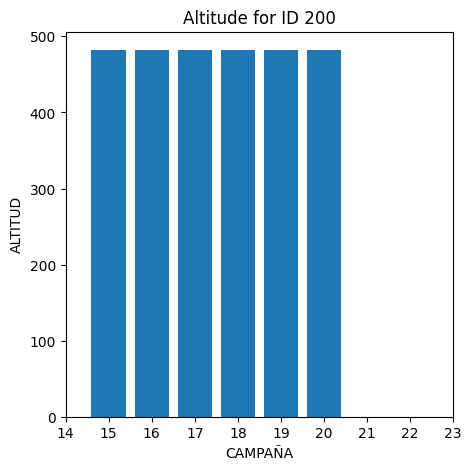

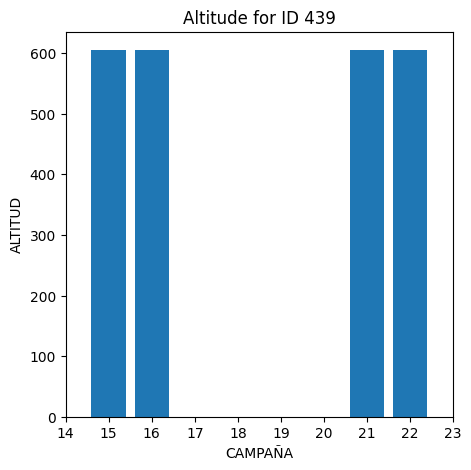

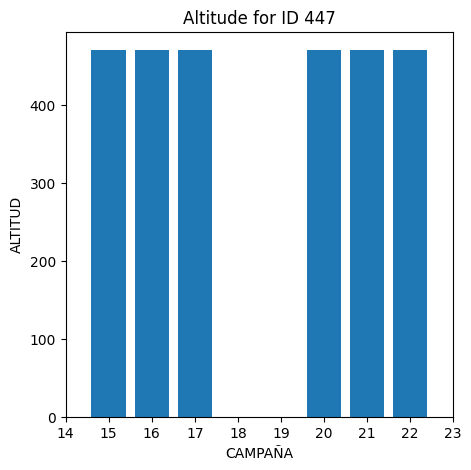

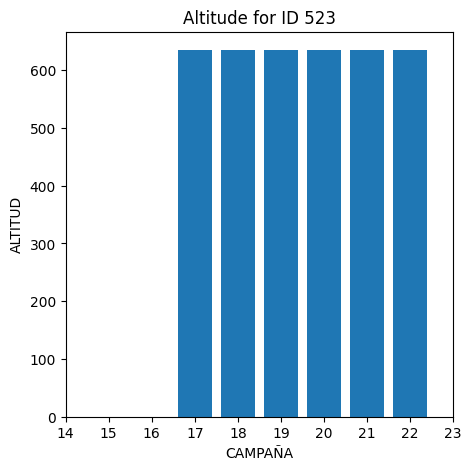

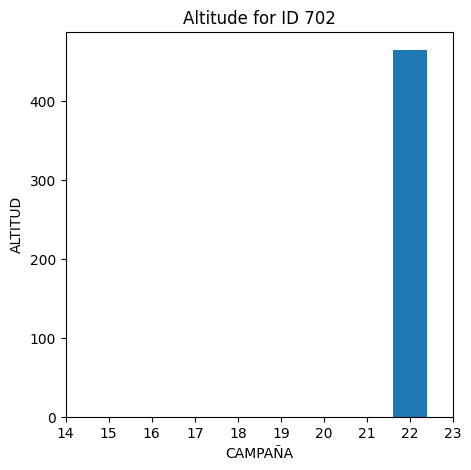

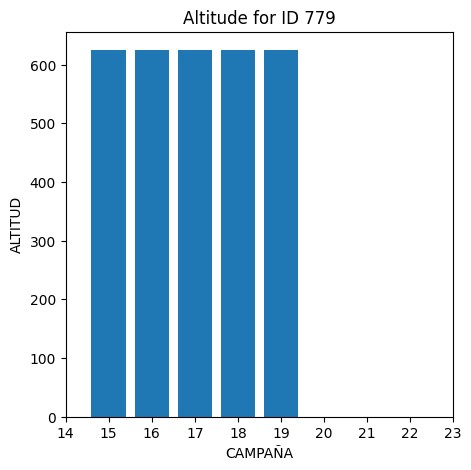

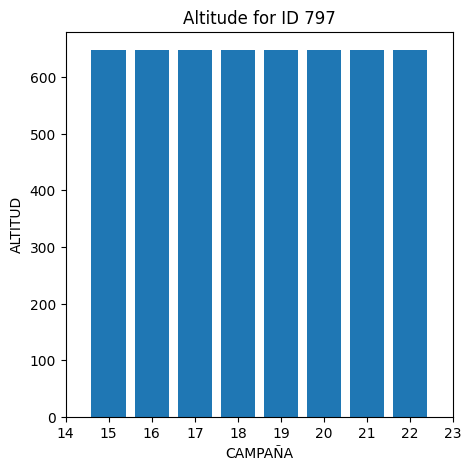

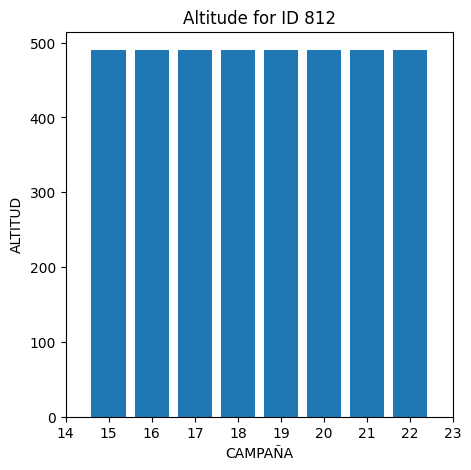

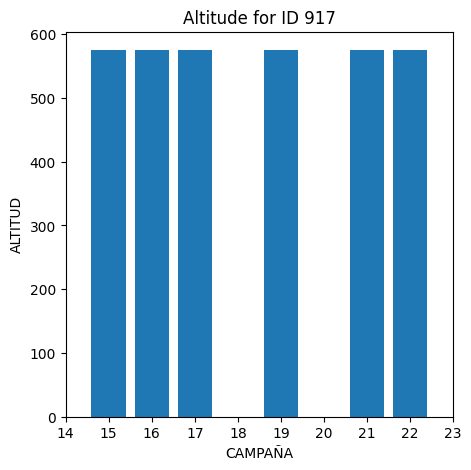

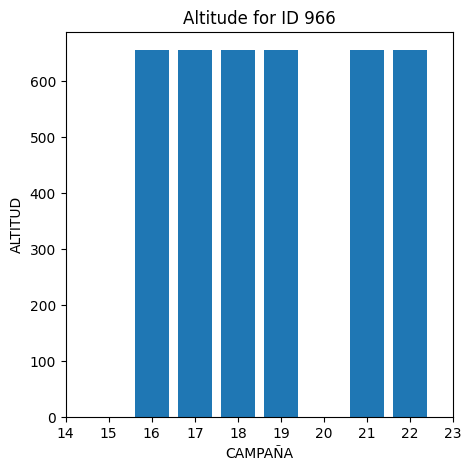

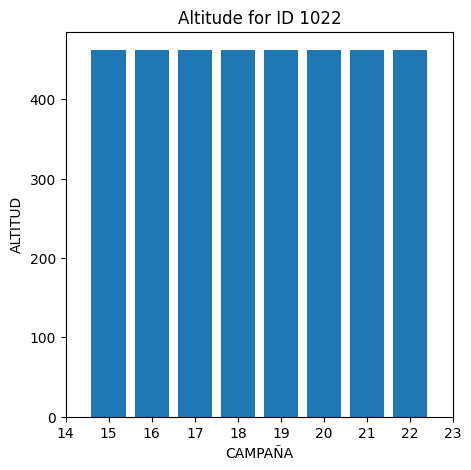

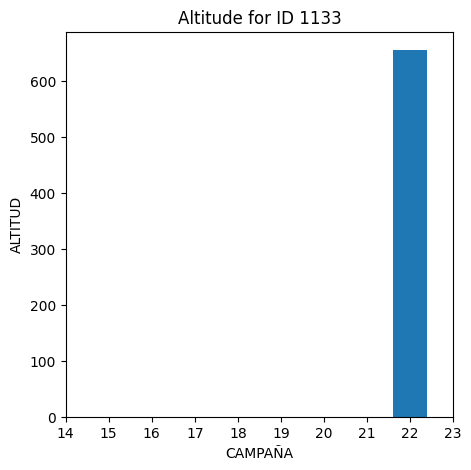


KeyboardInterrupt



In [16]:
# group dataframe by id
groups = train_joined_by_day.groupby('ID_FINCA')

# loop through groups and create a separate plot for each group
for name, group in groups:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(group['CAMPAÑA'], group['ALTITUD'])
    ax.set(title=f'Altitude for ID {name}', xlabel='CAMPAÑA', ylabel='ALTITUD')
    ax.set_xlim(14, 23)
    plt.show()

In [ ]:
# group dataframe by id
groups = train_joined_by_day.groupby('ID_FINCA')

# loop through groups and create a separate plot for each group
for name, group in groups:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(group['CAMPAÑA'], group['SUPERFICIE'])
    ax.set(title=f'Surface for ID {name}', xlabel='CAMPAÑA', ylabel='SUPERFICIE')
    ax.set_xlim(14, 23)
    plt.show()

# HOW TO DEAL WITH ALTITUD AND SUPERFICIE ⬇️

In [32]:
train_joined_by_day[["CAMPAÑA","ID_FINCA","ALTITUD","SUPERFICIE"]]

,CAMPAÑA,ID_FINCA,ALTITUD,SUPERFICIE
0,15,48626,600.0,0.0000
1,15,47921,600.0,0.0000
2,15,14001,0.0,0.0000
3,15,17059,0.0,0.0000
4,15,87611,0.0,0.0000
...,...,...,...,...
8448,22,37461,700.0,3.6800
8449,22,58769,700.0,4.2500
8450,22,58769,700.0,4.0700
8451,22,88928,700.0,4.5727


In [39]:
df_train.columns.values


array(['CAMPAÑA', 'ID_FINCA', 'ID_ZONA', 'ID_ESTACION', 'ALTITUD',
       'VARIEDAD', 'MODO', 'TIPO', 'COLOR', 'SUPERFICIE', 'PRODUCCION'],
      dtype=object)

In [41]:
from pandas_profiling import ProfileReport
df_train.columns
prof = ProfileReport(train_joined_by_day[df_train.columns.values])
prof.to_file(output_file='../docs/train_joined_by_day.html')

/home/carlos/.local/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# HOW TO DEAL WITH ALTITUD AND SUPERFICIE ⬆️

In [ ]:
assert False == True, "DO NOT EXECUTE EVERYTHING!"

In [67]:
mean_superficie = train_joined_by_day.loc[train_joined_by_day["SUPERFICIE"] != 0, "SUPERFICIE"].mean()
train_joined_by_day["SUPERFICIE"] = train_joined_by_day["SUPERFICIE"].fillna(mean_superficie)

In [68]:
train_joined_by_day_no_altitude = train_joined_by_day.drop(["ALTITUD"], axis=1)

In [69]:
train_joined_by_day_no_altitude.to_csv("../data/DATA_TRAIN_JOINED_DAYS_NO_ALT.csv", header=True, index=False)

## FILL ALTITUD CON RANDOM FOREST

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
random_grid = {
'max_depth': [5, 7, 10],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': 1000,
'criterion': "entropy"
}


joined = train_joined_by_day
X_train = joined.loc[joined["ALTITUD"] != "nan"]
y_train = X_train["ALTITUD"]
del X_train["ALTITUD"]
del X_train["PRODUCCION"]

X_test = joined.loc[(joined["ALTITUD"] == "nan") | (joined["ALTITUD"] == 22) ]
del X_test["ALTITUD"]
del X_test["PRODUCCION"]

0        nan
241      nan
242      nan
298      nan
299      nan
340      nan
341      nan
392      nan
393      nan
451      nan
452      nan
2768     nan
2977     nan
5905     nan
5906     nan
6342     nan
6343     nan
6761     nan
6762     nan
7176     nan
7177     nan
7554     nan
7555     nan
7931     nan
7932     nan
8328     nan
8329     nan
8330     nan
8331     nan
8332     nan
8333     nan
8334     nan
8335     nan
8454     nan
8455     nan
8456     nan
8575     nan
8584     nan
8713     nan
9062     nan
10450    nan
10451    nan
10646    nan
10845    nan
11022    nan
Name: ALTITUD, dtype: object

In [77]:
display(y_train)

1        800
2        800
3        500
4        500
5        500
        ... 
15741    445
15742    465
15743    445
15744    465
15745    445
Name: ALTITUD, Length: 15701, dtype: object

In [81]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
display(enc)

LabelEncoder()

In [82]:
print(y_train)

[52 52 18 ...  9 13  9]


In [83]:
enc.inverse_transform(y_train)

array([800, 800, 500, ..., 445, 465, 445], dtype=object)

In [46]:
rf = RandomForestClassifier(n_estimators=1000, criterion="entropy", max_depth=15, max_features="sqrt", verbose=1, n_jobs=8)

In [47]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   25.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  2.4min finished


RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       n_estimators=1000, n_jobs=8, verbose=1)

In [78]:
predictions = (rf.predict(X_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [92]:
print(predictions)

[22 24 24 48 48 51 48 50 50 50 50 37 37 11 11 11 11 11 11 11 11 11 11 11
 11 43 43 43 41 41 41 41 43 43 43 48 48 48 41 41 31 42 39 39 39]


(array([  33.,   48.,   31.,  143., 1245., 1428.,  913.,  734.,  472.,
         207.,  900.,  654., 1258., 1715., 1657., 1843., 1565.,  267.,
         476.,   86.,   14.,    4.,    0.,    2.,    6.]),
 array([370., 388., 406., 424., 442., 460., 478., 496., 514., 532., 550.,
        568., 586., 604., 622., 640., 658., 676., 694., 712., 730., 748.,
        766., 784., 802., 820.]),
 <BarContainer object of 25 artists>)

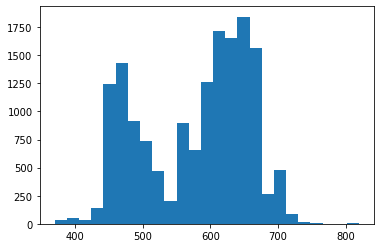

In [93]:
plt.hist(enc.inverse_transform(y_train), bins=25)

(array([12.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,
         0.,  2.,  3.,  7.,  6.,  0.,  0.,  6.,  0.,  0.,  4.,  1.]),
 array([455. , 466.8, 478.6, 490.4, 502.2, 514. , 525.8, 537.6, 549.4,
        561.2, 573. , 584.8, 596.6, 608.4, 620.2, 632. , 643.8, 655.6,
        667.4, 679.2, 691. , 702.8, 714.6, 726.4, 738.2, 750. ]),
 <BarContainer object of 25 artists>)

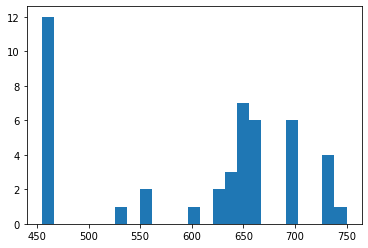

In [94]:
plt.hist(enc.inverse_transform(predictions), bins=25)

In [110]:
joined.loc[X_test.index, "ALTITUD"] = enc.inverse_transform(predictions)

<AxesSubplot: ylabel='Frequency'>

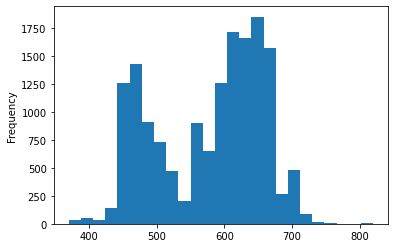

In [111]:
joined["ALTITUD"].plot.hist(bins=25)

(array([  33.,   48.,   31.,  143., 1245., 1428.,  913.,  734.,  472.,
         207.,  900.,  654., 1258., 1715., 1657., 1843., 1565.,  267.,
         476.,   86.,   14.,    4.,    0.,    2.,    6.]),
 array([370., 388., 406., 424., 442., 460., 478., 496., 514., 532., 550.,
        568., 586., 604., 622., 640., 658., 676., 694., 712., 730., 748.,
        766., 784., 802., 820.]),
 <BarContainer object of 25 artists>)

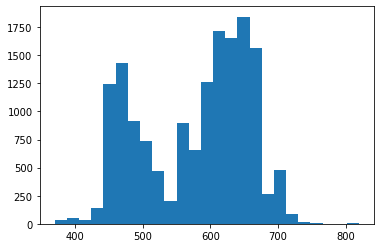

In [112]:
plt.hist(enc.inverse_transform(y_train), bins=25)

In [115]:
joined["ALTITUD"].isna().sum()

0

In [116]:
display(joined)

,ID_ESTACION,CAMPAÑA,precip1Hour_month_1_day_1,precip1Hour_month_1_day_2,precip1Hour_month_1_day_3,precip1Hour_month_1_day_4,precip1Hour_month_1_day_5,precip1Hour_month_1_day_6,precip1Hour_month_1_day_7,precip1Hour_month_1_day_8,...,windSpeed_month_12_day_31,ID_FINCA,ID_ZONA,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,0.0,20.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,11.750000,62285,126,530,94,2,0,0,4.0082,16250.0
1,1.0,17.0,0.0,0.045833,0.0,0.0,0.000000,0.000000,0.0,0.0,...,22.533333,81518,388,800,17,1,0,1,0.0000,10070.0
2,1.0,18.0,0.0,0.000000,0.0,0.0,0.000000,0.291667,0.0,0.0,...,5.304167,81518,388,800,17,1,0,1,0.0000,25370.0
3,2.0,15.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,9.604167,19515,973,500,32,2,0,1,0.0000,19544.0
4,2.0,15.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,9.604167,35465,964,500,32,2,0,1,0.0000,13960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15741,19.0,22.0,0.0,0.000000,0.0,0.0,0.108333,0.000000,0.0,0.0,...,6.808333,42777,349,445,59,1,0,1,0.7800,NaN
15742,19.0,22.0,0.0,0.000000,0.0,0.0,0.108333,0.000000,0.0,0.0,...,6.808333,42777,349,465,59,1,0,1,0.7800,NaN
15743,19.0,22.0,0.0,0.000000,0.0,0.0,0.108333,0.000000,0.0,0.0,...,6.808333,69003,349,445,59,1,0,1,3.5610,NaN
15744,19.0,22.0,0.0,0.000000,0.0,0.0,0.108333,0.000000,0.0,0.0,...,6.808333,69003,349,465,59,1,0,1,3.5610,NaN


In [117]:
joined["ALTITUD"] = joined["ALTITUD"].astype(int)

In [118]:
joined.to_csv("../data/DATA_TRAIN_JOINED_DAYS.csv", index=False)

# ETO

In [133]:
df_eto = load(ROOT+"/DATOS_ETO.TXT")
df_eto[df_eto.isna().any(axis=1)]


,date,DewpointLocalAfternoonAvg,DewpointLocalAfternoonMax,DewpointLocalAfternoonMin,DewpointLocalDayAvg,DewpointLocalDayMax,DewpointLocalDayMin,DewpointLocalDaytimeAvg,DewpointLocalDaytimeMax,DewpointLocalDaytimeMin,...,WindSpeedLocalMorningAvg,WindSpeedLocalMorningMax,WindSpeedLocalMorningMin,WindSpeedLocalNighttimeAvg,WindSpeedLocalNighttimeMax,WindSpeedLocalNighttimeMin,WindSpeedLocalOvernightAvg,WindSpeedLocalOvernightMax,WindSpeedLocalOvernightMin,ID_ESTACION
0,20150629,285.9,285.9,285.9,286.0,287.0,285.4,285.9,285.9,285.9,...,NaN,NaN,NaN,2.6,5.0,1.1,1.7,2.1,1.1,13
1,20150630,283.0,283.6,282.5,284.3,286.5,282.5,283.2,283.9,282.5,...,2.2,3.8,1.4,2.7,5.2,1.4,1.5,1.9,1.4,13
2,20150701,286.1,286.5,285.5,285.8,288.0,283.8,285.4,286.5,283.8,...,2.7,4.3,1.2,3.0,5.7,1.4,1.9,2.8,1.4,13
3,20150702,288.9,289.4,287.9,288.3,291.8,286.1,287.7,289.4,286.1,...,1.7,2.3,1.2,3.6,5.4,2.4,2.7,3.4,2.4,13
4,20150703,289.1,290.4,288.5,290.5,293.0,287.8,290.6,293.0,288.5,...,3.5,5.0,2.3,3.1,6.0,1.5,1.9,2.2,1.5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51175,20220626,284.0,285.0,283.0,285.0,288.0,283.0,285.0,286.0,283.0,...,2.1,2.6,1.2,2.1,5.2,0.6,1.1,1.6,0.6,8
51176,20220627,289.0,289.0,288.0,288.0,290.0,286.0,289.0,290.0,288.0,...,3.2,3.9,2.2,3.1,5.0,1.4,1.8,2.8,1.4,8
51177,20220628,283.0,285.0,282.0,286.0,290.0,282.0,284.0,287.0,282.0,...,1.8,2.5,1.2,2.4,5.0,1.0,1.3,1.7,1.0,8
51178,20220629,283.0,285.0,282.0,285.0,288.0,282.0,284.0,286.0,282.0,...,2.2,3.1,1.3,2.7,5.4,1.3,1.6,1.9,1.3,8


In [143]:
for i in df_eto.columns:
    print(i)

date
DewpointLocalAfternoonAvg
DewpointLocalAfternoonMax
DewpointLocalAfternoonMin
DewpointLocalDayAvg
DewpointLocalDayMax
DewpointLocalDayMin
DewpointLocalDaytimeAvg
DewpointLocalDaytimeMax
DewpointLocalDaytimeMin
DewpointLocalEveningAvg
DewpointLocalEveningMax
DewpointLocalEveningMin
DewpointLocalMorningAvg
DewpointLocalMorningMax
DewpointLocalMorningMin
DewpointLocalNighttimeAvg
DewpointLocalNighttimeMax
DewpointLocalNighttimeMin
DewpointLocalOvernightAvg
DewpointLocalOvernightMax
DewpointLocalOvernightMin
EvapotranspirationLocalAfternoonAvg
EvapotranspirationLocalAfternoonMax
EvapotranspirationLocalAfternoonMin
EvapotranspirationLocalDayAvg
EvapotranspirationLocalDayMax
EvapotranspirationLocalDayMin
EvapotranspirationLocalDaytimeAvg
EvapotranspirationLocalDaytimeMax
EvapotranspirationLocalDaytimeMin
EvapotranspirationLocalEveningAvg
EvapotranspirationLocalEveningMax
EvapotranspirationLocalEveningMin
EvapotranspirationLocalMorningAvg
EvapotranspirationLocalMorningMax
Evapotranspirat

,date,PrecipAmountLocalDayAvg
0,20150629,0.0
1,20150630,0.0
2,20150701,0.0
3,20150702,0.0
4,20150703,0.0
...,...,...
51175,20220626,0.0
51176,20220627,0.0
51177,20220628,0.0
51178,20220629,0.0


# Explore Functions

In [22]:
   # In this case the test will be the year 2022
# TODO MIRAR MILLOR EL JOIN
def join_train_test_split(df1:pd.DataFrame, df2:pd.DataFrame):

    df1 = df2.join(df1, on="ID_ESTACION",lsuffix="_" ,how="outer")

    train = df1[df1["year"] != 2022]
    test = df1[df1["year"] == 2022]

    train_y = train["PRODUCCION"]
    test_y = test["PRODUCCION"]

    train.drop("PRODUCCION", axis="columns")
    test.drop("PRODUCCION", axis="columns")

    return train, test, train_y, test_y 

    
def compute_correlations(df:pd.DataFrame):
    return (df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates())

def topk_correlations(df:pd.DataFrame, k:float=0.7):
    correlations = compute_correlations(df)
    
    top_k_percent = [pairs for pairs, value in correlations.items() if value >= k]
    return top_k_percent

def select_features_LR(X_train, y_train,X_test, y_test, correlation_pairs):
    pairs_scores = []
    features1,features2 = correlation_pairs
    
    #train
    y_train_indexes = y_train.index[y_train.isna() == False]
    y_train = y_train.dropna()
    
    #test
    y_test_indexes = y_test.index[y_test.isna() == False]
    y_test = y_test.dropna()
    
    
    for p1, p2 in zip(features1,features2):
        #fit the regressors
        Xtr = X_train.iloc[y_train_indexes]
        Xt = X_test.iloc[y_test_indexes]
        
        reg1 = LinearRegression().fit(Xtr[p1].to_numpy().reshape(-1,1), y_train)
        reg2 = LinearRegression().fit(Xtr[p2].to_numpy().reshape(-1,1), y_train)
        
        #scores
        s1 = reg1.score(Xt[p1].to_numpy().reshape(-1,1), y_test)
        s2 = reg2.score(Xt[p2].to_numpy().reshape(-1,1), y_test)
        
        if s1 >= s2:pairs_scores.append((p1,s1, f"lose {p2}"))
            
        else:pairs_scores.append((p2,s2, f"lose {p1}"))
            
        
    return pairs_scores



In [13]:
X_train, X_test, y_train, y_test = join_train_test_split(df_meteo,df_train)


In [14]:
X_train["VARIEDAD"].unique()

array([26., 32., 59., 40., 87., 17., 52., 81., 68.,  9.,  8., 94., 71.,
       15., 23., 43., 48., 62., 65.,  4., 84., 55., 92., 38., nan])

In [134]:
X_test.shape, y_test.shape

((9814, 45), (9814,))

In [135]:
correlations = list(zip(*topk_correlations(X_train)))

In [136]:
newX_train = X_train[X_train["year"] != 2021].reset_index(drop=True)
newy_train = y_train[X_train["year"] != 2021].reset_index(drop=True)

newX_test = X_train[X_train["year"] == 2021].reset_index(drop=True)
newy_test = y_train[X_train["year"] == 2021].reset_index(drop=True)



In [137]:
selected = select_features_LR(X_train=newX_train, y_train=newy_train, X_test=newX_test, y_test=newy_test, correlation_pairs=correlations)
(selected)

[('precip1Hour', -2.8779504330556094e-05, 'lose precip1Hour'),
 ('snow3Day', -2.0864610211557277e-05, 'lose snow2Day'),
 ('temperatureFeelsLike', 0.0010773450963691422, 'lose temperature'),
 ('ID_ZONA', 0.0041460349189286205, 'lose ID_ESTACION'),
 ('ID_ESTACION', -6.263131300543456e-05, 'lose ID_ESTACION_train'),
 ('snow2Day', -2.2035554688493164e-05, 'lose snow24Hour'),
 ('snow3Day', -2.0864610211557277e-05, 'lose snow24Hour'),
 ('precip3Day', -1.0347280501310507e-05, 'lose precip2Day'),
 ('snow3Day', -2.0864610211557277e-05, 'lose snow7Day'),
 ('snow7Day', -2.1595243673511177e-05, 'lose snow2Day'),
 ('windSpeed', 9.527136916642753e-05, 'lose windGust'),
 ('ID_ZONA', 0.0041460349189286205, 'lose ID_ESTACION_train'),
 ('precipYtd', 8.137255169604618e-05, 'lose month'),
 ('precip24Hour', -1.0936298537655986e-05, 'lose precip2Day'),
 ('temperature', 0.0009253992479907325, 'lose temperatureMax24Hour'),
 ('temperatureFeelsLike', 0.0010773450963691422, 'lose temperatureMax24Hour'),
 ('snow7

# Plot Functions


In [185]:
def plot_distribution(df:pd.DataFrame, column:str):
    if df.get("year", None) is not None:
        sns.displot(df, x=column, hue="year", multiple="dodge")
    else:
        sns.displot(df, x=column)
        

def plot_forecasting(x_axis, y_axis, classes: Optional[list], column:str):
    sns.relplot(x=x_axis,y=y_axis,kind="line", hue=classes, markers=True,legend=True)

In [234]:
X_train.columns

Index(['CAMPAÑA', 'ID_FINCA', 'ID_ZONA', 'ID_ESTACION_train', 'ALTITUD',
       'VARIEDAD', 'MODO', 'TIPO', 'COLOR', 'SUPERFICIE', 'PRODUCCION',
       'precip1Hour', 'precip6Hour', 'precip24Hour', 'precip2Day',
       'precip3Day', 'precip7Day', 'precipMtd', 'precipYtd', 'pressureChange',
       'pressureMeanSeaLevel', 'relativeHumidity', 'snow1Hour', 'snow6Hour',
       'snow24Hour', 'snow2Day', 'snow3Day', 'snow7Day', 'snowMtd',
       'snowSeason', 'snowYtd', 'temperature', 'temperatureChange24Hour',
       'temperatureMax24Hour', 'temperatureMin24Hour', 'temperatureDewPoint',
       'temperatureFeelsLike', 'uvIndex', 'visibility', 'windDirection',
       'windGust', 'windSpeed', 'ID_ESTACION', 'year', 'month'],
      dtype='object')

In [16]:
X_train.groupby(["VARIEDAD", "ID_ESTACION_"]).mean()

CAMPAÑA      ID_FINCA     ID_ZONA  MODO  TIPO  COLOR  \
VARIEDAD ID_ESTACION_                                                           
4.0      5.0           18.280000  50081.640000  340.040000   2.0   1.0    1.0   
         16.0          18.000000  44057.000000  272.000000   2.0   1.0    1.0   
8.0      3.0           19.500000  59388.000000   71.000000   1.5   0.0    0.0   
         7.0           19.000000  64798.000000  616.000000   2.0   0.0    0.0   
         15.0          17.500000  52008.000000  412.000000   2.0   0.0    0.0   
...                          ...           ...         ...   ...   ...    ...   
94.0     9.0           20.500000  13333.000000  784.000000   2.0   0.0    0.0   
         15.0          19.562500  49373.625000  464.250000   2.0   0.0    0.0   
         16.0          20.000000  53738.750000  772.500000   2.0   0.0    0.0   
         18.0          20.750000  66942.125000  277.625000   2.0   0.0    0.0   
         19.0          20.666667  61622.333333  557.333333   2.0   0.0    0.0   

                       SUPERFICIE    PRODUCCION  precip1Hour  precip6Hour  \
VARIEDAD ID_ESTACION_                                                       
4.0      5.0             2.907208  19812.412640          NaN          NaN   
         16.0            1.158571  14672.834571          NaN          NaN   
8.0      3.0             1.181950  12205.000000          NaN          NaN   
         7.0             0.629400   3789.000000          NaN          NaN   
         15.0            1.776950  37654.566000          NaN          NaN   
...                           ...           ...          ...          ...   
94.0     9.0             1.459700   8970.000000          NaN          NaN   
         15.0            1.541813  11294.548000          NaN          NaN   
         16.0            2.245800  10133.750000          NaN          NaN   
         18.0            3.057438   9850.904000          NaN          NaN   
         19.0            1.340567   5146.666667          NaN          NaN   

                       ...  temperatureDewPoint  temperatureFeelsLike  \
VARIEDAD ID_ESTACION_  ...                                              
4.0      5.0           ...                  NaN                   NaN   
         16.0          ...                  NaN                   NaN   
8.0      3.0           ...                  NaN                   NaN   
         7.0           ...                  NaN                   NaN   
         15.0          ...                  NaN                   NaN   
...                    ...                  ...                   ...   
94.0     9.0           ...                  NaN                   NaN   
         15.0          ...                  NaN                   NaN   
         16.0          ...                  NaN                   NaN   
         18.0          ...                  NaN                   NaN   
         19.0          ...                  NaN                   NaN   

                       uvIndex  visibility  windDirection  windGust  \
VARIEDAD ID_ESTACION_                                                 
4.0      5.0               NaN         NaN            NaN       NaN   
         16.0              NaN         NaN            NaN       NaN   
8.0      3.0               NaN         NaN            NaN       NaN   
         7.0               NaN         NaN            NaN       NaN   
         15.0              NaN         NaN            NaN       NaN   
...                        ...         ...            ...       ...   
94.0     9.0               NaN         NaN            NaN       NaN   
         15.0              NaN         NaN            NaN       NaN   
         16.0              NaN         NaN            NaN       NaN   
         18.0              NaN         NaN            NaN       NaN   
         19.0              NaN         NaN            NaN       NaN   

                       windSpeed  ID_ESTACION  year  month  
VARIEDAD ID_ESTACION_             

In [232]:
(df_train["VARIEDAD"].unique())

array([26, 32, 59, 40, 87, 17, 52, 81, 68,  9, 71, 15, 84, 62,  8, 43, 65,
       92, 55,  4, 94, 23, 38, 48])

In [21]:
X_train

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION_,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed,ID_ESTACION,year,month
0.0,14.0,76953.0,515.0,4.0,660,26.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1.0,14.0,84318.0,515.0,4.0,660,26.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
2.0,14.0,85579.0,340.0,4.0,520,32.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
3.0,14.0,69671.0,340.0,4.0,520,32.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
12.0,14.0,5696.0,919.0,14.0,650-660,59.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,9.5,0.0,13.82,300.0,34.6,21.6,1219242,2021.0,12.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,9.0,0.0,13.98,290.0,30.2,19.4,1219243,2021.0,12.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.8,8.8,0.0,14.15,300.0,29.9,19.4,1219244,2021.0,12.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,8.0,0.0,13.55,290.0,28.4,19.1,1219247,2021.0,12.0


In [18]:
(X_train.groupby(["ID_FINCA", "VARIEDAD", "year"])).mean()

,,,CAMPAÑA,ID_ZONA,ID_ESTACION_,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION,precip1Hour,precip6Hour,...,temperatureMin24Hour,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed,ID_ESTACION,month
ID_FINCA,VARIEDAD,year,,,,,,,,,,,,,,,,,,,,,
